## Importing libraries

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

## Importing Dataset

In [3]:
dataset = pd.read_csv('Emotion Dataset (English Text).csv', index_col=False)

In [4]:
dataset.head()

,serial,text,label
0,0,i didnt feel humiliated,sadness
1,1,i can go from feeling so hopeless to so damned...,sadness
2,2,im grabbing a minute to post i feel greedy wrong,anger
3,3,i am ever feeling nostalgic about the fireplac...,love
4,4,i am feeling grouchy,anger


## Exploratory Data Analysis

### Analyzing details of the dataset

In [5]:
#Columns/features in data
dataset.columns

Index(['serial', 'text', 'label'], dtype='object')

In [6]:
# length of the dataset
print('length of data is', len(dataset))

length of data is 20000


In [7]:
# shape of data
dataset.shape

(20000, 3)

In [8]:
# data information
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20000 entries, 0 to 19999
Data columns (total 3 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   serial  20000 non-null  int64 
 1   text    20000 non-null  object
 2   label   20000 non-null  object
dtypes: int64(1), object(2)
memory usage: 468.9+ KB


In [9]:
#Datatypes of all columns
dataset.dtypes

serial     int64
text      object
label     object
dtype: object

In [10]:
#Rows and columns in the dataset
print('Count of columns in the data is:  ', len(dataset.columns))
print('Count of rows in the data is:  ', len(dataset))

Count of columns in the data is:   3
Count of rows in the data is:   20000


In [11]:
#Check unique label values
dataset['label'].unique()

array(['sadness', 'anger', 'love', 'surprise', 'fear', 'joy'],
      dtype=object)

In [12]:
#Check the number of label values
dataset['label'].nunique()

6

<Axes: xlabel='label', ylabel='count'>

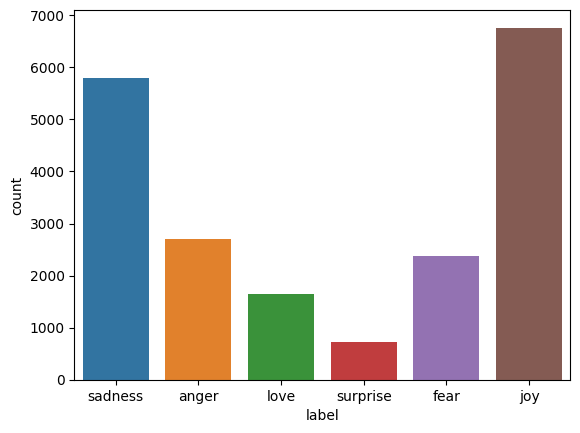

In [13]:
import seaborn as sns
sns.countplot(x='label', data=dataset)

### Droping the data of the label which has the least count

<Axes: xlabel='label', ylabel='count'>

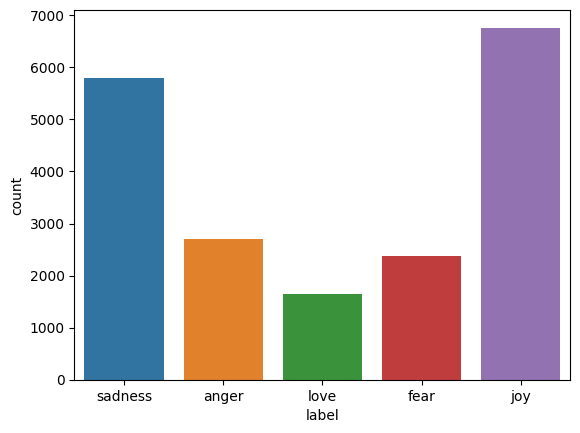

In [14]:
# defining indices
index_def = dataset[(dataset['label']=='surprise')].index

# droping the label with least count
dataset = dataset.drop(index_def)

# plot the bar chart
sns.countplot(x='label', data=dataset)

In [15]:
dataset['label'].value_counts()

joy        6761
sadness    5797
anger      2709
fear       2373
love       1641
Name: label, dtype: int64

### Downsampling the dataset based on these two labels (joy and sadness)

In [16]:
sadness_data = dataset[dataset.label == 'sadness']
joy_data = dataset[dataset.label == 'joy']

In [17]:
sadness_data = sadness_data.sample(2800)
joy_data = joy_data.sample(2800)

<Axes: xlabel='label', ylabel='count'>

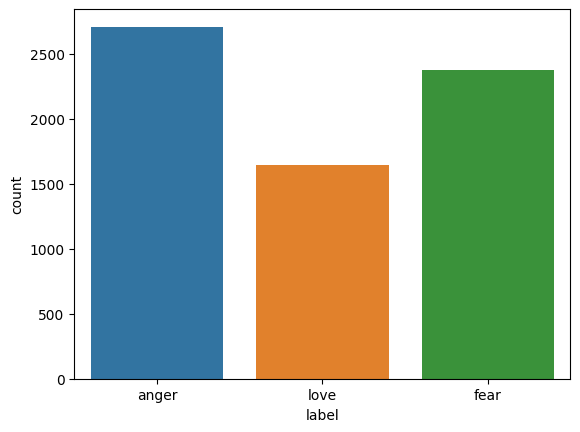

In [18]:
# Droping joy and sadness data from the dataset
# defining indices
index_def = dataset[(dataset['label']=='sadness') | (dataset['label']=='joy')].index

# droping the label with least count
dataset = dataset.drop(index_def)

# plot the bar chart
sns.countplot(x='label', data=dataset)

<Axes: xlabel='label', ylabel='count'>

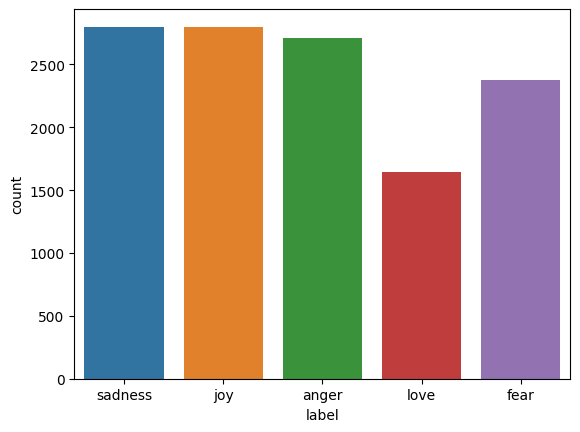

In [19]:
# Concating the sampled sadness and joy data with the dataset
dataset = pd.concat([sadness_data, joy_data, dataset], axis=0)
sns.countplot(x='label', data=dataset)

### Applying oversampling as the label 'love' contains significantly low freuency

In [20]:
from imblearn.over_sampling import RandomOverSampler
from collections import Counter

In [21]:
features = (dataset['text'].to_numpy()).reshape(-1, 1)
labels = (dataset['label'].to_numpy()).reshape(-1, 1)

In [22]:
oversampler = RandomOverSampler(random_state=42)
featured_resampled, labels_resampled = oversampler.fit_resample(features, labels)

In [23]:
print(Counter(labels_resampled))

Counter({'sadness': 2800, 'joy': 2800, 'anger': 2800, 'love': 2800, 'fear': 2800})


In [24]:
featured_resampled = pd.DataFrame(featured_resampled)
featured_resampled = featured_resampled.rename(columns={featured_resampled.columns[0]: 'text'})

labels_resampled = pd.DataFrame(labels_resampled)
labels_resampled = labels_resampled.rename(columns={labels_resampled.columns[0]: 'lable'})

dataset = pd.concat([featured_resampled, labels_resampled], axis=1)

In [25]:
dataset.head()

,text,lable
0,i feel so emotional today,sadness
1,i already went out of my way to be as consider...,sadness
2,i will be able to feel a little bit more emoti...,sadness
3,i feel sad because levi certainly wont want to...,sadness
4,i try not to care when hes with his party frie...,sadness


In [26]:
dataset.shape

(14000, 2)

<Axes: xlabel='lable', ylabel='count'>

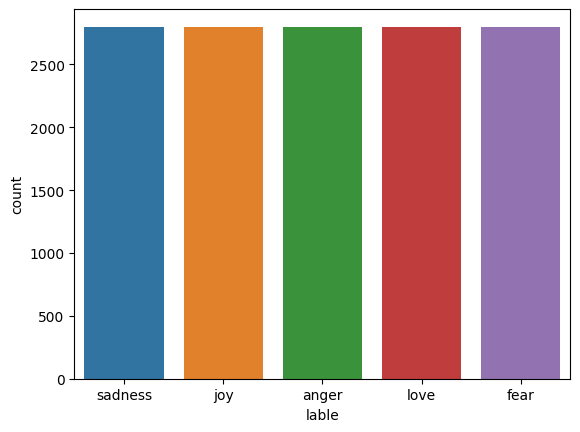

In [27]:
sns.countplot(x='lable', data=dataset)

## Data cleaning

In [28]:
!pip install neattext

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 114.7/114.7 kB 4.4 MB/s eta 0:00:00


In [29]:
import neattext.functions as nfx

In [30]:
dataset['clean_text'] = dataset['text'].apply(nfx.remove_stopwords)  # removing stopwords
dataset['clean_text'] = dataset['clean_text'].apply(nfx.remove_userhandles)  # removing user handles
dataset['clean_text'] = dataset['clean_text'].apply(nfx.remove_punctuations)  # removing punctuations
dataset['clean_text'] = dataset['clean_text'].apply(nfx.remove_special_characters)  # removing special characters
dataset['clean_text'] = dataset['clean_text'].str.lower()  # converting text to lower case

In [31]:
dataset.head()

,text,lable,clean_text
0,i feel so emotional today,sadness,feel emotional today
1,i already went out of my way to be as consider...,sadness,went way considerate possible feel like abused
2,i will be able to feel a little bit more emoti...,sadness,able feel little bit emotional freedom
3,i feel sad because levi certainly wont want to...,sadness,feel sad levi certainly wont want run race typ...
4,i try not to care when hes with his party frie...,sadness,try care hes party friends especially doesnt u...


### Stemming and Lemmatizing the clean_text

In [32]:
import nltk
nltk.download('punkt')
nltk.download('wordnet')
nltk.download('averaged_perceptron_tagger')
from nltk.stem import PorterStemmer, LancasterStemmer, RegexpStemmer, WordNetLemmatizer
from nltk.tokenize import sent_tokenize, word_tokenize

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     /root/nltk_data...
[nltk_data]   Unzipping taggers/averaged_perceptron_tagger.zip.


**Choices for pos parameter in the lemmatizer**

*   'n' --> nouns (NN, NNS, NNP, NNPS)
*   'v' --> verbs (VB, VBD, VBG, VBN, VBP, VBZ)
*   'a' --> adjectives (JJ, JJR, JJS)
*   'r' --> adverbs (RB, RBR, RBS)

In [33]:
# finds nltk tag for each word in a sentence
def lemmatizer_tag_finder(sentence):
  tokens = word_tokenize(sentence)
  tag_list = dict(nltk.pos_tag(tokens))

  for tag in tag_list:
    if tag_list[tag].startswith('NN'):
      tag_list[tag] = 'n'
    elif tag_list[tag].startswith('VB'):
      tag_list[tag] = 'v'
    elif tag_list[tag].startswith('JJ'):
      tag_list[tag] = 'a'
    elif tag_list[tag].startswith('RB'):
      tag_list[tag] = 'r'
    else:
      tag_list[tag] = 'others'

  return tag_list

In [34]:
# returns a lemmatized sentence
def sentence_lemmatizer(sentence):
  words_and_tags = lemmatizer_tag_finder(sentence)
  lemmatized_sentence = []
  lemmatizer = WordNetLemmatizer()

  for word in words_and_tags:
    if words_and_tags[word] == 'others':
      lemmatized_sentence.append(word)
    else:
      lemmatized_sentence.append(lemmatizer.lemmatize(word, pos=words_and_tags[word]))

  return " ".join(lemmatized_sentence)

In [35]:
pd.options.mode.chained_assignment = None

length = len(dataset['clean_text'])

for index in range(0, length):
  sentence = dataset['clean_text'][index]
  dataset['clean_text'][index] = sentence_lemmatizer(sentence)

In [36]:
dataset.head()

,text,lable,clean_text
0,i feel so emotional today,sadness,feel emotional today
1,i already went out of my way to be as consider...,sadness,go way considerate possible feel like abused
2,i will be able to feel a little bit more emoti...,sadness,able feel little bit emotional freedom
3,i feel sad because levi certainly wont want to...,sadness,feel sad levi certainly wont want run race typ...
4,i try not to care when hes with his party frie...,sadness,try care he party friend especially doesnt usu...


### Correcting spell of words in the clean_text

In [ ]:
!pip install autocorrect

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
import re
from autocorrect import Speller

In [ ]:
# create an instance of Speller
spell = Speller(lang='en')

# define function to reduce and correct text
def reduce_and_correct(text):
    words = text.split()
    reduced_words = [spell(word) for word in words]
    reduced_text = ' '.join(reduced_words)
    return reduced_text

In [ ]:
# apply function to input column and create output column
dataset['clean_text'] = dataset['clean_text'].apply(reduce_and_correct)

In [ ]:
dataset.head()

,serial,text,label,clean_text
0,0,i didnt feel humiliated,sadness,didnt feel humiliate
1,1,i can go from feeling so hopeless to so damned...,sadness,feel hopeless damn hopeful care awake
2,2,im grabbing a minute to post i feel greedy wrong,anger,im grab minute post feel greedy wrong
3,3,i am ever feeling nostalgic about the fireplac...,love,feel nostalgic fireplace know property
4,4,i am feeling grouchy,anger,feel grouchy


## Ploting cloud of words for sad and joy text

In [37]:
from wordcloud import WordCloud

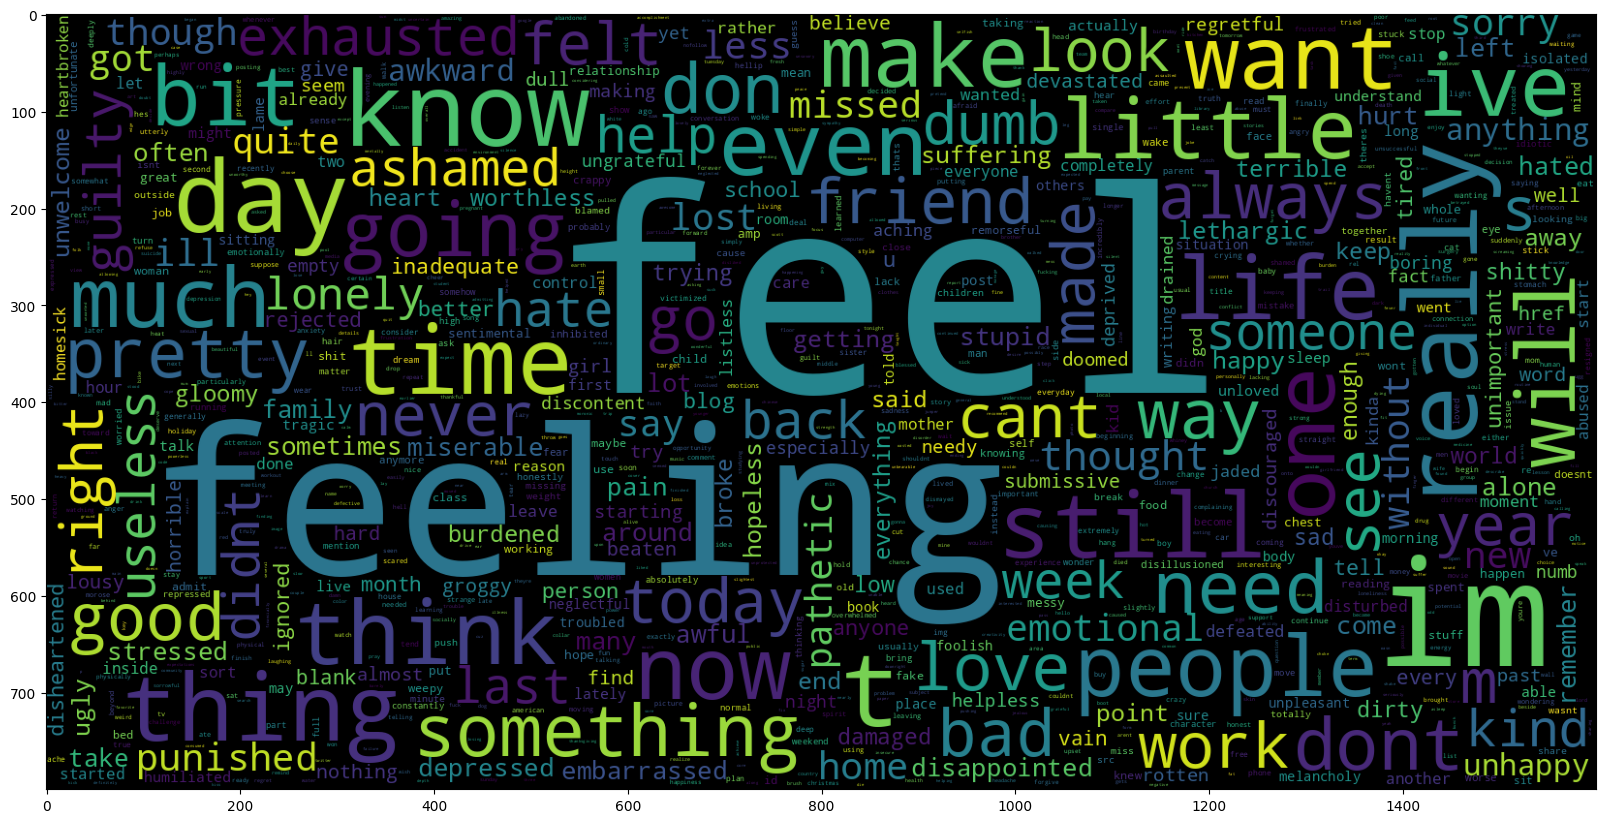

In [40]:
# getting sad text for cloud of words
data_sadness = dataset[dataset['lable'] == 'sadness']
data_sadness = data_sadness['text'][1000:]

#Plot a cloud of words for sad text
wc = WordCloud(max_words = 1000 , width = 1600 , height = 800, collocations=False).generate(" ".join(data_sadness))
plt.figure(figsize = (20,20))
plt.imshow(wc)

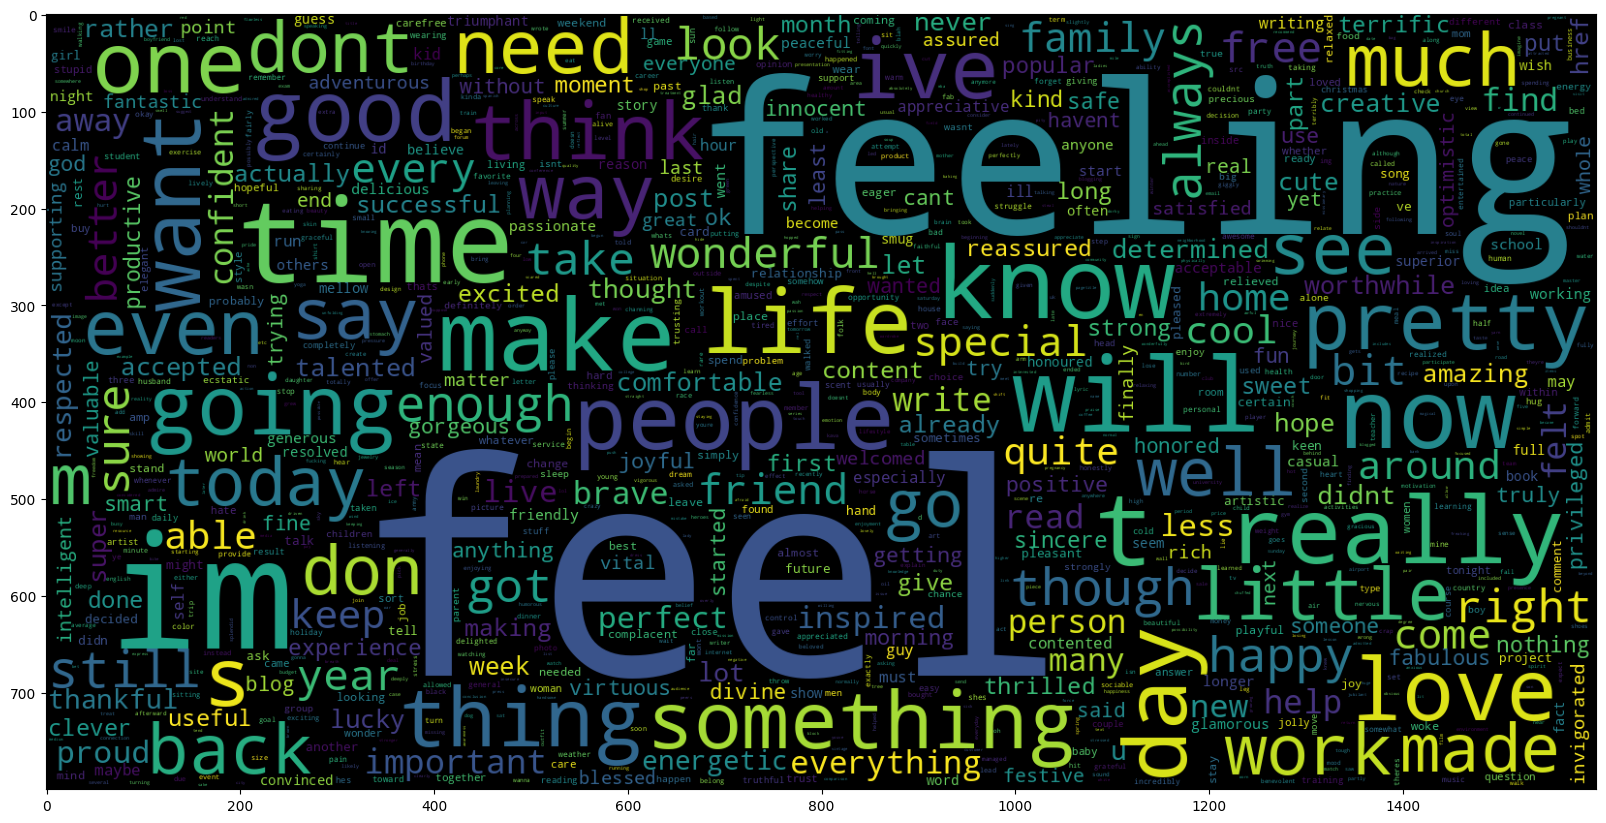

In [41]:
# getting sad text for cloud of words
data_joy = dataset[dataset['lable'] == 'joy']
data_joy = data_joy['text'][1000:]

#Plot a cloud of words for sad text
wc = WordCloud(max_words = 1000 , width = 1600 , height = 800, collocations=False).generate(" ".join(data_joy))
plt.figure(figsize = (20,20))
plt.imshow(wc)

## Feature extraction

In [42]:
xfeatures = dataset['clean_text']
ylabels = dataset['lable']

In [43]:
xfeatures.head()

0                                 feel emotional today
1         go way considerate possible feel like abused
2               able feel little bit emotional freedom
3    feel sad levi certainly wont want run race typ...
4    try care he party friend especially doesnt usu...
Name: clean_text, dtype: object

In [44]:
ylabels

0        sadness
1        sadness
2        sadness
3        sadness
4        sadness
          ...   
13995       love
13996       love
13997       love
13998       love
13999       love
Name: lable, Length: 14000, dtype: object

### Spliting data for pipeline

In [45]:
from sklearn.model_selection import train_test_split

In [46]:
x_train_p, x_test_p, y_train_p, y_test_p = train_test_split(xfeatures, ylabels, test_size=0.2, random_state = 0)

### Converting text into vectors

In [47]:
# vectorizer
from sklearn.feature_extraction.text import TfidfVectorizer

In [48]:
vectorizer = TfidfVectorizer()
xfeatures = vectorizer.fit_transform(xfeatures)

In [49]:
print(xfeatures.todense())

[[0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 ...
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]]


### Spliting data into training set and test set

In [50]:
from sklearn.model_selection import train_test_split

In [51]:
x_train, x_test, y_train, y_test = train_test_split(xfeatures, ylabels, test_size=0.2, random_state = 0)

In [52]:
type(x_train)

scipy.sparse._csr.csr_matrix

## Building models

In [53]:
# machine learning models
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import MultinomialNB, BernoulliNB
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier

# Metrics
from sklearn.metrics import accuracy_score, confusion_matrix, ConfusionMatrixDisplay, classification_report, precision_score, recall_score, f1_score

In [54]:
# training all the models on the training set
from pandas.core.generic import RandomState
models = {
    'Logistic Regression': LogisticRegression(solver='lbfgs',class_weight='balanced', max_iter=10000),
    'Naive Bayes': MultinomialNB(),
    'Bernoulli Naive Bayes': BernoulliNB(),
    'Dicision Tree': DecisionTreeClassifier(),
    'SVM': SVC(kernel='rbf', random_state=0),
    'Random Forest': RandomForestClassifier(),
    'KNN': KNeighborsClassifier(n_neighbors=5, metric='minkowski', p=2)
}

for model_index in models:
  # training each model on training set
  model = models[model_index]
  model.fit(x_train, y_train)

  # make prediction on training set
  y_train_pred = model.predict(x_train)

  # make prediction on test set
  y_pred = model.predict(x_test)

  print('------------------------------------')

  # training set performance
  print('Training set performance for model ', model_index, ' :')
  print('   Accuracy score : ', accuracy_score(y_train, y_train_pred))
  print('   f1 score       : ', f1_score(y_train, y_train_pred, average='weighted'))
  print('   precision score: ', precision_score(y_train, y_train_pred, average='weighted'))
  print('   recall score   : ', recall_score(y_train, y_train_pred, average='weighted'))

  print('\n')

  # training set performance
  print('Test set performance for model ', model_index, ' :')
  print('   Accuracy score : ', accuracy_score(y_test, y_pred))
  print('   f1 score       : ', f1_score(y_test, y_pred, average='weighted'))
  print('   precision score: ', precision_score(y_test, y_pred, average='weighted'))
  print('   recall score   : ', recall_score(y_test, y_pred, average='weighted'))

------------------------------------
Training set performance for model  Logistic Regression  :
   Accuracy score :  0.9597321428571428
   f1 score       :  0.9596833346615563
   precision score:  0.9600480316844452
   recall score   :  0.9597321428571428


Test set performance for model  Logistic Regression  :
   Accuracy score :  0.8917857142857143
   f1 score       :  0.8917685895675878
   precision score:  0.89196092100381
   recall score   :  0.8917857142857143
------------------------------------
Training set performance for model  Naive Bayes  :
   Accuracy score :  0.9507142857142857
   f1 score       :  0.9506582129173401
   precision score:  0.9509455107086121
   recall score   :  0.9507142857142857


Test set performance for model  Naive Bayes  :
   Accuracy score :  0.8575
   f1 score       :  0.8572275892448384
   precision score:  0.8580145886204301
   recall score   :  0.8575
------------------------------------
Training set performance for model  Bernoulli Naive Bayes  

In [55]:
# getting the trained model from the models dictionary
model =  models['SVM']

# making predictions
predictions = model.predict(x_test)

print(classification_report(y_test, predictions))

              precision    recall  f1-score   support

       anger       0.90      0.89      0.89       596
        fear       0.93      0.91      0.92       554
         joy       0.84      0.90      0.87       547
        love       0.92      0.91      0.92       579
     sadness       0.89      0.86      0.88       524

    accuracy                           0.90      2800
   macro avg       0.90      0.89      0.89      2800
weighted avg       0.90      0.90      0.90      2800



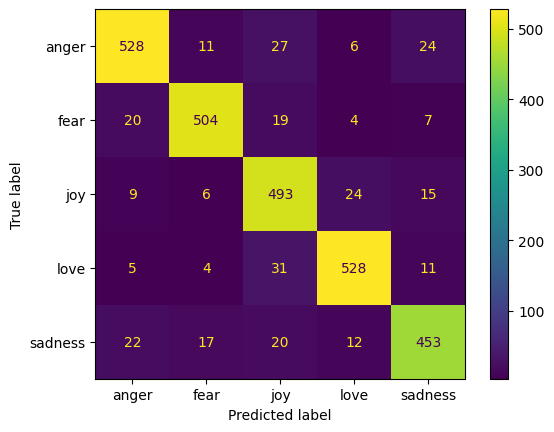

In [56]:
# setting confusion matrix parameters
cm = confusion_matrix(y_test, predictions, labels=model.classes_)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=model.classes_)

# showing confusion matrix
disp.plot()
plt.show()

In [66]:
from yellowbrick.classifier import ROCAUC

categories = {
    'sadness': 0, 
    'anger': 1, 
    'love': 2,
    'fear': 3, 
    'joy': 4
}

def plot_ROC_curve(model, xtrain, ytrain, xtest, ytest):

    # Creating visualization with the readable labels
    visualizer = ROCAUC(model, encoder=categories)
                                        
    # Fitting to the training data first then scoring with the test data                                    
    visualizer.fit(xtrain, ytrain)
    visualizer.score(xtest, ytest)
    visualizer.show()

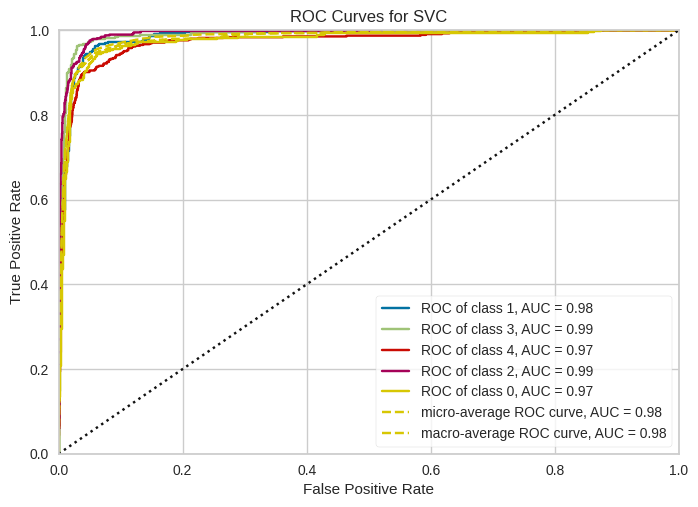

In [67]:
plot_ROC_curve(model, x_train, y_train, x_test, y_test)

## Building pipeline using best model based on the accuracy

In [59]:
from sklearn.pipeline import Pipeline

In [60]:
pipe_svm = Pipeline(steps = [
    ('vectorizer', TfidfVectorizer()), 
    ('SVM', SVC(kernel='rbf', random_state=0),)
])

In [61]:
pipe_svm.fit(x_train_p, y_train_p)

Pipeline(steps=[('vectorizer', TfidfVectorizer()),
                ('SVM', SVC(random_state=0))])

In [62]:
pipe_svm.score(x_test_p, y_test_p)

0.9003571428571429

In [63]:
text = input("Enter a sentence: ")
print("The emotion detected from the sentence is: ", pipe_svm.predict([text])[0])

Enter a sentence: we have finished our project successfully.
The emotion detected from the sentence is:  joy


## Saving the trained model

In [64]:
import joblib

In [65]:
pipeline_file = open('SVM_emotion_classifier_11_may_2023.pkl', 'wb')
joblib.dump(pipe_svm, pipeline_file)
pipeline_file.close()